In [3]:
from hdf5storage import loadmat, savemat 
import numpy as np 
from matplotlib import pyplot as plt


In [2]:
outdict=loadmat('conditions_all.mat')
conditions_all=outdict["conditions_all"]

In [3]:
# %% Organize indicies for the 4 states
Uncoupled_Ind=np.zeros((12,3))
L_Lead_Ind=np.zeros((12,3)) # they were leading indicies for L subject but following for R
R_Lead_Ind=np.zeros((12,3))
Mutual_Ind=np.zeros((12,3))
for ses in range(12):
    Uncoupled_Ind[ses]=np.asarray(np.where(conditions_all[ses]==1))
    L_Lead_Ind[ses]=np.asarray(np.where(conditions_all[ses]==2))
    R_Lead_Ind[ses]=np.asarray(np.where(conditions_all[ses]==3))
    Mutual_Ind[ses]=np.asarray(np.where(conditions_all[ses]==4))

In [2]:
dict_pcorrall=loadmat('pacorr_all.mat')
pacorr_all=dict_pcorrall['pacorr_all']

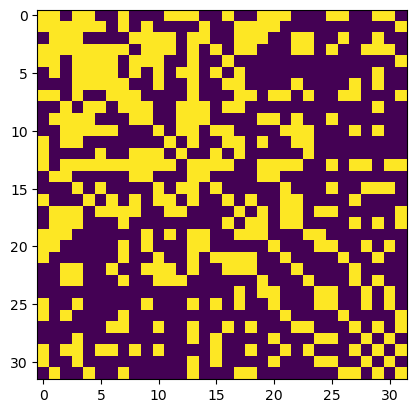

In [15]:
# temp
plt.imshow(pacorr_all[0,0,0,16,:,:].astype(bool))

In [5]:
# %% load pacor as bool
# no need for thresholding
nonzerosmat=np.zeros((12,2,12,30,32,32))
for ses in range(12):
	for subj in range(2):
		for trl in range(12):			
			for freq in range(30):
				nonzerosmat[ses][subj][trl][freq,:,:]\
					=np.array(pacorr_all[ses][subj][trl][freq,:,:],dtype=bool)

In [6]:
# append all trials of the same state together
append_Uncoupled=list(); append_Mutual=list()
append_Leading=list(); append_Following=list()

for ses in range(12):
    for subj in range(2):
        for trl in range(3):
            if subj == 0:
                append_Uncoupled.append(nonzerosmat[ses][subj][int(Uncoupled_Ind[ses][trl])])
                append_Leading.append(nonzerosmat[ses][subj][int(L_Lead_Ind[ses][trl])])
                append_Following.append(nonzerosmat[ses][subj][int(R_Lead_Ind[ses][trl])])
                append_Mutual.append(nonzerosmat[ses][subj][int(Mutual_Ind[ses][trl])])
            else:
                append_Uncoupled.append(nonzerosmat[ses][subj][int(Uncoupled_Ind[ses][trl])])
                append_Leading.append(nonzerosmat[ses][subj][int(R_Lead_Ind[ses][trl])])
                append_Following.append(nonzerosmat[ses][subj][int(L_Lead_Ind[ses][trl])])
                append_Mutual.append(nonzerosmat[ses][subj][int(Mutual_Ind[ses][trl])])

#  combine the 4 states in a list
append_4states=[append_Uncoupled,append_Leading,append_Following,append_Mutual]

In [7]:
outdict=dict()
outdict['append_4states']=append_4states
savemat('append_4states',outdict,store_python_metadata=True)